<a href="https://colab.research.google.com/github/PervejHosen/Learning-Python/blob/main/Class_05_(ML_01_Machine_Learning_Overview).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of a Machine Learning Project
[when data is cleaned]

# **What we're covering here:**

0. An end-to-end Scikit-Learn workflow,
1. Getting the data ready,
2. Choose the right estimator/algorithm for our problems,
3. Fit the model/algorithm and use it to make predictions on our data,
4. Evaluating a model,
5. Improve a model,
6. Save and load a trained model,
7. Putting it all together.

**Mounting Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Neccessary Libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading & Reading the datasets**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Python/Datasets/heart-disease (1).csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Inspecting Null/Missing Values**

In [9]:
# Check for null values and count them
null_count = df.isnull().sum()
null_count

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Another way to check the missing value**

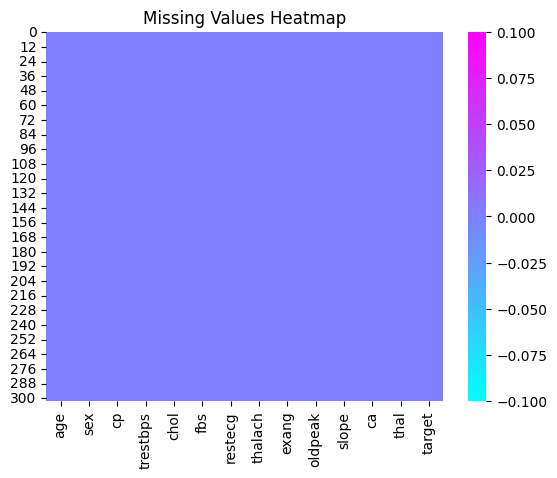

In [14]:
# Create a boolean mask where True represents missing values
null_mask = df.isnull()

# Use seaborn heatmap to visualize the missing values
sns.heatmap(null_mask, cmap='cool', cbar=True)

# Set plot title
plt.title('Missing Values Heatmap')

# Display the plot
plt.show()

**Spliting the data into Dependent & Independent Features(X,Y)**

In [17]:
# Features List
X = df.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y = df["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
print(X.shape)
print(y.shape)

(303, 13)
(303,)


**Importing Machine Learning Models**

In [20]:
# Importing the ML Library of Python (Scikit-Learn)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=40)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Splitting the dataset into Train-Test**

In [21]:
#Splitting the Train-Test Datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


**Fitting The Model**

In [22]:
# fitting the model
clf.fit(X_train, y_train);

**Checking Prediction**

In [23]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [24]:
y_preds.shape

(61,)

In [25]:
y_test

191    0
1      1
250    0
290    0
263    0
      ..
285    0
140    1
227    0
40     1
258    0
Name: target, Length: 61, dtype: int64

In [26]:
clf.score(X_test, y_test)

0.8524590163934426

**Creating Confusion Matrix**

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 3, 29]])

In [28]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [29]:
accuracy_score(y_test, y_preds)

0.8524590163934426

**Estimators Fitting for maximum accuracy**

In [30]:
np.random.seed(42)
for i in range (10, 200, 10):
  print(f"Trying model with {i} estimators:")
  clf = RandomForestClassifier(n_estimators = i).fit(X_train,y_train)
  print(f"Model Accuracy on Test Set: {clf.score(X_test, y_test)* 100:.2f}%")
  print("")

Trying model with 10 estimators:
Model Accuracy on Test Set: 80.33%

Trying model with 20 estimators:
Model Accuracy on Test Set: 81.97%

Trying model with 30 estimators:
Model Accuracy on Test Set: 86.89%

Trying model with 40 estimators:
Model Accuracy on Test Set: 83.61%

Trying model with 50 estimators:
Model Accuracy on Test Set: 86.89%

Trying model with 60 estimators:
Model Accuracy on Test Set: 88.52%

Trying model with 70 estimators:
Model Accuracy on Test Set: 86.89%

Trying model with 80 estimators:
Model Accuracy on Test Set: 86.89%

Trying model with 90 estimators:
Model Accuracy on Test Set: 83.61%

Trying model with 100 estimators:
Model Accuracy on Test Set: 83.61%

Trying model with 110 estimators:
Model Accuracy on Test Set: 85.25%

Trying model with 120 estimators:
Model Accuracy on Test Set: 83.61%

Trying model with 130 estimators:
Model Accuracy on Test Set: 83.61%

Trying model with 140 estimators:
Model Accuracy on Test Set: 85.25%

Trying model with 150 estimat

In [31]:
import pickle
pickle.dump(clf, open("Random_Forest_Model_1.pkl", "wb"))

In [32]:
loaded_model = pickle.load(open("Random_Forest_Model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8688524590163934